In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
os.chdir('../../')
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


In [2]:
LoI_data = pd.read_csv("data/scenario_files/losing_industry/Wheat2mean_values.csv")
print("The yield reduction globally for global catastrophic infrastructure is: ", LoI_data["mean_value"].median())
print("This considers n = ", len(LoI_data), " countries")

The yield reduction globally for global catastrophic infrastructure is:  -33.96857678890228
This considers n =  94  countries


In [3]:
NW_data = pd.read_csv("data/scenario_files/nuclear_winter/xia_37tg_y3_swheat.csv")
print("The yield reduction globally for nuclear winter is: ", NW_data["37tg"].median())
print("This considers n = ", len(NW_data), " countries")

The yield reduction globally for nuclear winter is:  -27.91
This considers n =  123  countries


In [4]:
ISIMIP = pd.read_csv(
        "." + "/data/scenario_files/ISIMIP_climate/ISIMIP_wheat_Hedlung.csv",
        index_col=0,
    )
nan_indices = ISIMIP.index[ISIMIP.iloc[:, 0].isnull()].tolist()

In [5]:

base_year = 2018
Wheat_base = PyTradeShifts(
    "Wheat",
    base_year=base_year,
    region="Global",
    testing=False,
    cd_kwargs={"seed": 2},
    make_plot=False,
)
loss_of_industry = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="losing_industry/Wheat2mean_values.csv",
    scenario_name="GCIL",
    cd_kwargs={"seed": 2},
    make_plot=False,
)
asrs = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="nuclear_winter/xia_47tg_y3_swheat.csv",
    scenario_name="ASRS",
    cd_kwargs={"seed": 2},
    make_plot=False,
)
climate_change = PyTradeShifts(
    crop="Wheat",
    base_year=2018,
    scenario_file_name="ISIMIP_climate/ISIMIP_wheat_Hedlung.csv",
    scenario_name="RCP 8.5",
    cd_kwargs={"seed":2},
    make_plot=False,
)

Loaded data for Wheat in Y2018.
Removed 0 countries with no trade or production.
No countries removed.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2018.
Removed 0 countries with no trade or production.
No countries removed.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario GCIL.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2018.
Removed 0 countries with no trade or production.
No countries removed.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario ASRS.
Built trade graph.
Found 5 trade communities.
Loaded data for Wheat in Y2018.
Removed 0 countries with no trade or production.
No countries removed.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th 

In [6]:
climate_comparison = Postprocessing([Wheat_base, loss_of_industry, asrs, climate_change], anchor_countries=["United States", "Russia", "Uzbekistan" "Germany"])

Starting postprocessing computations...


ERROR 1: PROJ: proj_create_from_database: Open of /home/florian/miniforge3/envs/pytradeshifts/share/proj failed


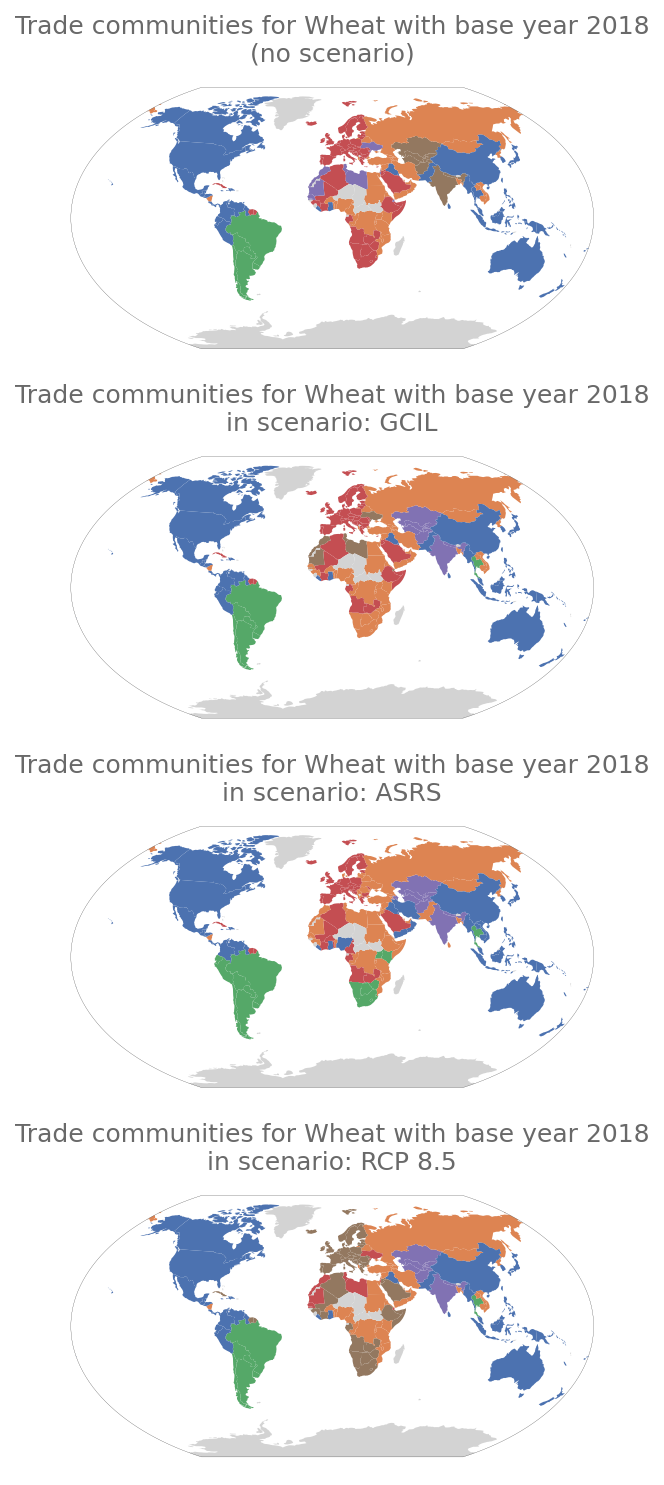

In [7]:
climate_comparison.plot_all_trade_communities(figsize=(15, 10))

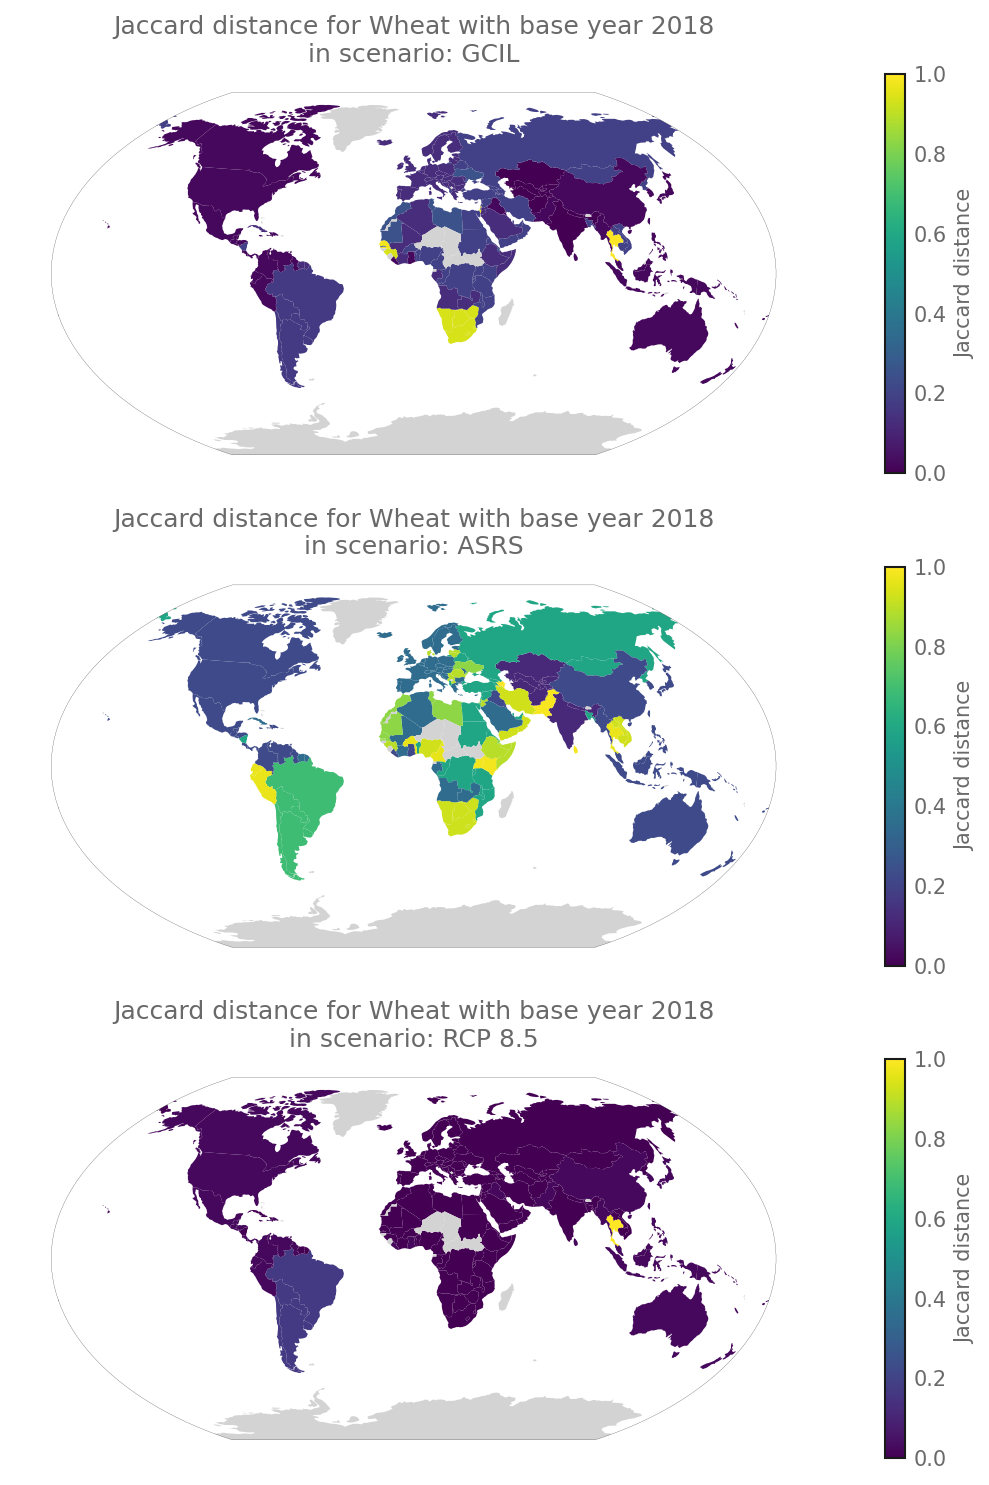

In [8]:
climate_comparison.plot_community_difference(figsize=(10, 10), vmin=0, vmax=1)

In [11]:
crop_network_df = []
# Create an empty dataframe
network_df = pd.DataFrame(columns=['Scenario', "Country", "Crop", 'Jaccard Distance','Imports Relative Difference'])
for i, scenario in enumerate(["GCIL", "ASRS", "RCP 8.5"]):
# Calculate the median for the jaccard distance
    jaccard_similarity = climate_comparison.jaccard_indices[i+1]

    # Calculate the median for the imports relative difference
    imports_relative_difference = climate_comparison.imports_difference[i]

    # Concat the data to the dataframe
    for country in jaccard_similarity.keys():
        temp_df = pd.DataFrame({
            'Scenario': scenario,
            'Country': country,
            "Crop": "Wheat",
            'Jaccard Distance': jaccard_similarity[country] - 1,
            'Imports Relative Difference': imports_relative_difference[country]
        }, index=[0])
        network_df = pd.concat([network_df, temp_df], ignore_index=True)
crop_network_df.append(network_df)

# Concat all
network_df = pd.concat(crop_network_df, ignore_index=True)
network_df.head()

/tmp/ipykernel_3069/1923204243.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, temp_df], ignore_index=True)


,Scenario,Country,Crop,Jaccard Distance,Imports Relative Difference
0,GCIL,Afghanistan,Wheat,0.000000,-5.709552
1,GCIL,Albania,Wheat,-0.187500,-27.452546
2,GCIL,Algeria,Wheat,-0.125000,-52.639737
3,GCIL,Angola,Wheat,-0.125000,-54.490116
4,GCIL,Argentina,Wheat,-0.166667,0.000000


Text(0, 0.5, 'Imports Relative Difference [%]')

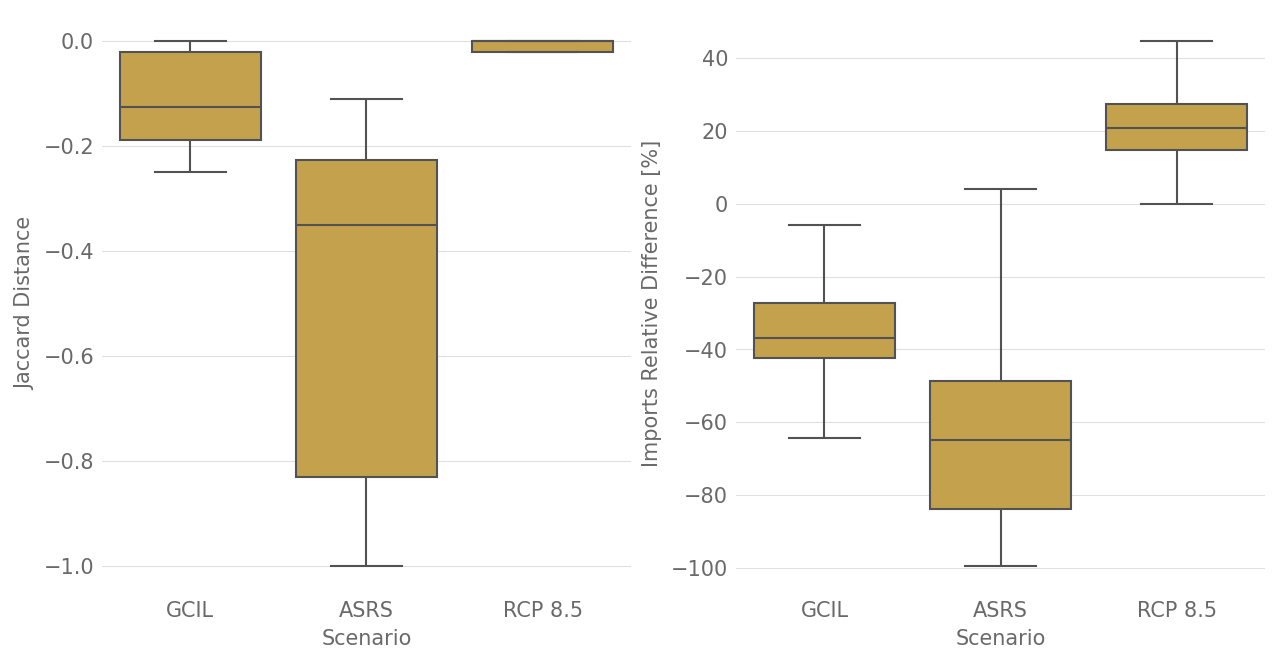

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='Scenario', y='Jaccard Distance', hue="Crop", data=network_df, ax=axes[0], palette= ["#d6a93a"], showfliers=False, zorder=5)
sns.boxplot(x='Scenario', y='Imports Relative Difference', hue="Crop", data=network_df, ax=axes[1], palette= ["#d6a93a"], showfliers=False, zorder=5)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].set_ylabel("Jaccard Distance")
axes[1].set_ylabel("Imports Relative Difference [%]")
